In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
from google.colab import auth
import gspread
from google.auth import default

FileNotFoundError: [Errno 2] No such file or directory: 'data1.csv'

In [7]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [6]:
worksheet = gc.open('sample').sheet1
data = worksheet.get_all_values()

In [10]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'input':'float'})
dataset1 = dataset1.astype({'output':'float'})

In [11]:
dataset1.head()

,input,output
0,1.0,1.0
1,2.0,4.0
2,3.0,6.0
3,4.0,9.0
4,5.0,25.0


In [12]:
X = dataset1[['input']].values
y = dataset1[['output']].values

In [13]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [16]:
Scaler = MinMaxScaler()

In [17]:
Scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train1 = Scaler.transform(X_train)

In [22]:
#Create the model
ai_brain = Sequential([
    Dense(13,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 11ms/step - loss: 333781.9375
Epoch 502/3000
1/1 [==============================] - 0s 10ms/step - loss: 333705.6875
Epoch 503/3000
1/1 [==============================] - 0s 16ms/step - loss: 333629.2188
Epoch 504/3000
1/1 [==============================] - 0s 15ms/step - loss: 333552.6250
Epoch 505/3000
1/1 [==============================] - 0s 12ms/step - loss: 333475.7812
Epoch 506/3000
1/1 [==============================] - 0s 10ms/step - loss: 333398.6875
Epoch 507/3000
1/1 [==============================] - 0s 9ms/step - loss: 333321.4688
Epoch 508/3000
1/1 [==============================] - 0s 10ms/step - loss: 333243.9688
Epoch 509/3000
1/1 [==============================] - 0s 10ms/step - loss: 333166.2812
Epoch 510/3000
1/1 [==============================] - 0s 13ms/step - loss: 333088.3750
Epoch 511/3000
1/1 [==============================] - 0s 10ms/step - loss: 333010.3125
Epoch 51

<Axes: >

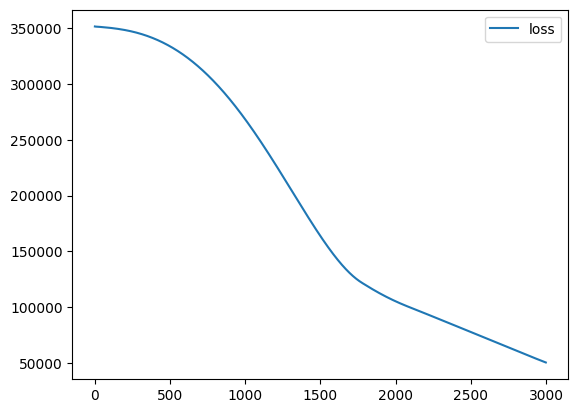

In [23]:
#Compile the model
ai_brain.compile(optimizer = 'rmsprop' , loss = 'mse')

ai_brain.fit(X_train1 , y_train,epochs = 3000)

loss_df = pd.DataFrame(ai_brain.history.history)

loss_df.plot()

In [24]:
loss_df = pd.DataFrame(ai_brain.history.history)

MITHUN MS, 212222240067


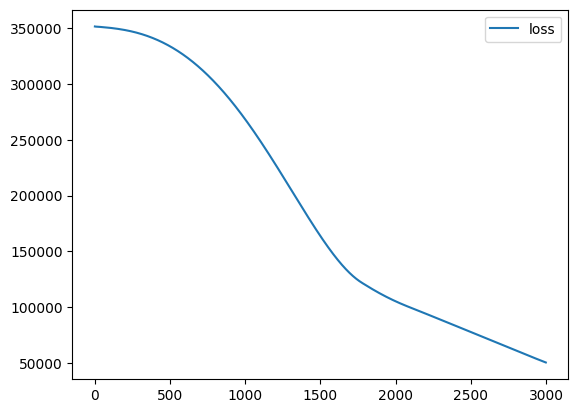

In [31]:
loss_df.plot()
print("MITHUN MS, 212222240067")


In [26]:
X_test1 = Scaler.transform(X_test)

In [27]:
ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 166ms/step - loss: 52908.1758


52908.17578125

In [28]:
X_n1 = [[30]]

In [29]:
X_n1_1 = Scaler.transform(X_n1)

In [34]:
ai_brain.predict(X_n1_1)


1/1 [==============================] - 0s 23ms/step


array([[1419.3551]], dtype=float32)